In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [31]:
## Here we will choose sine function

In [32]:
a=np.zeros((472,1))

In [33]:
# x=0
# i=0
# while x<2*math.pi and i<500:
#     a[i]=math.sin(x)
#     x+=1/75
#     i+=1
# print(i)
# print(len(a))

In [34]:
independent=np.zeros((472,1))
for i in range(472):
    independent[i]=i+1
    

In [43]:
a= np.genfromtxt('data_sin_function.csv', delimiter=',')

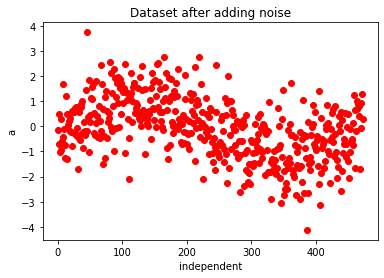

In [44]:
plt.scatter(independent,a,color="red")
#plt.plot(x,regressor.predict(x),color="blue")
#plt.title("SLR model(Salary prediction)")
plt.title("Dataset after adding noise")
plt.xlabel("independent")
plt.ylabel("a")
plt.show()

In [45]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,a,test_size=0.2,random_state=0) 

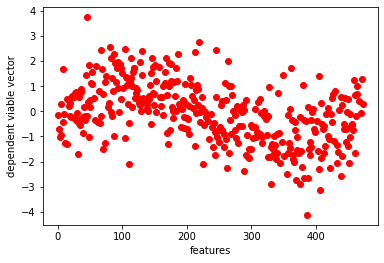

In [46]:
plt.scatter(x_train,y_train,color="red")
#plt.plot(x,regressor.predict(x),color="blue")
#plt.title("SLR model(Salary prediction)")
plt.xlabel("features")
plt.ylabel("dependent viable vector")
plt.show()

In [47]:

## Simple linear regression
from sklearn.preprocessing import PolynomialFeatures
lin_reg=PolynomialFeatures(degree=1) ## y=bx^0+bx+bx^2 ----u may consider this as a MLR model with 4 features
x_lin=lin_reg.fit_transform(x_train)##this is the required matrix
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_lin,y_train)


LinearRegression()

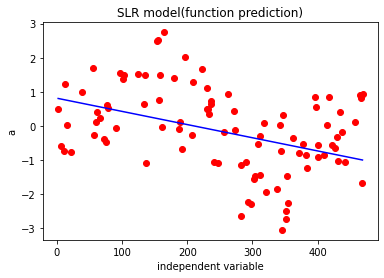

In [48]:
## Since the previous curve looks like st.line joining the points,hence in order to give a curvy feel to our graph,we'll need a change in the code
x_grid=np.arange(min(x_test),max(x_test),0.1) ##arange from numpy-increasing the points by 0.1 instead of having integers
x_grid=x_grid.reshape((len(x_grid)),1)

##standard process(replacing x_grid by x)
plt.scatter(x_test,y_test,color="red")
##training xgrid
x_grid_lin=lin_reg.fit_transform(x_grid)
plt.plot(x_grid,regressor.predict(x_grid_lin),color="blue")
plt.title("SLR model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()

In [49]:
from math import sqrt
from sklearn.metrics import mean_squared_error
pred=regressor.predict(lin_reg.fit_transform(x_test))
rms1 = sqrt(mean_squared_error(y_test, pred))
print(rms1)

1.132177230884953


In [50]:
## Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3) ## y=bx^0+bx+bx^2 ----u may consider this as a MLR model with 4 features
x_poly=poly_reg.fit_transform(x_train)##this is the required matrix
from sklearn.linear_model import LinearRegression
regressor2=LinearRegression()
regressor2.fit(x_poly,y_train)


LinearRegression()

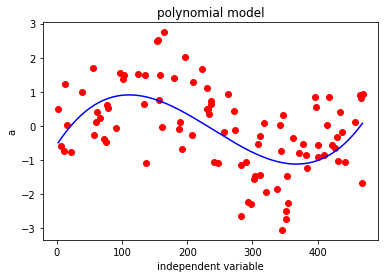

In [51]:
## Since the previous curve looks like st.line joining the points,hence in order to give a curvy feel to our graph,we'll need a change in the code
x_grid=np.arange(min(x_test),max(x_test),0.1) ##arange from numpy-increasing the points by 0.1 instead of having integers
x_grid=x_grid.reshape((len(x_grid)),1)

##standard process(replacing x_grid by x)
plt.scatter(x_test,y_test,color="red")
##training xgrid
x_grid_poly=poly_reg.fit_transform(x_grid)
plt.plot(x_grid,regressor2.predict(x_grid_poly),color="blue")
plt.title("polynomial model")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()

In [52]:

from math import sqrt
from sklearn.metrics import mean_squared_error
pred2=regressor2.predict(poly_reg.fit_transform(x_test))
rms2 = sqrt(mean_squared_error(y_test, pred2))
print(rms2)

0.9715487094575831


In [53]:
## B-spline

xp = np.linspace(x_test.min(),x_test.max(),20)
## Generating 4 degree  spline
transformed_x = dmatrix("bs(train, knots=(75,150,225),degree=3 ,include_intercept=False)", {"train": x_train},return_type='dataframe')
x_spline = sm.GLM(y_train, transformed_x).fit()
pred=x_spline.predict(dmatrix("bs(xp, knots=(75,150,225),degree =3 ,include_intercept=False)",{"xp": xp}, return_type='dataframe'))
pred_orig=x_spline.predict(dmatrix("bs(valid, knots=(75,150,225),degree =3,include_intercept=False)",{"valid": x_test}, return_type='dataframe'))

In [54]:
print()

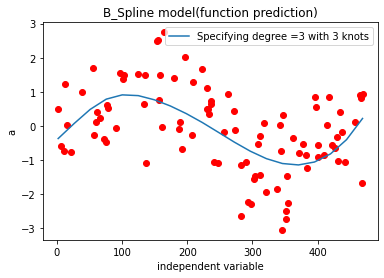

In [55]:
# Plot the splines and error bands
#plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)


plt.scatter(x_test,y_test,color="red")
plt.plot(xp,pred, label='Specifying degree =3 with 3 knots')
#plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.title("B_Spline model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()

In [56]:
rms3 = sqrt(mean_squared_error(y_test, pred_orig))
print(rms3)

0.9687513064568803


In [57]:
## Cyclic cubic spline

transformed_x4 = dmatrix("cc(train,df = 6)", {"train": x_train}, return_type='dataframe')
cyclic_spline = sm.GLM(y_train, transformed_x4).fit()
pred5 = cyclic_spline.predict(dmatrix("cc(valid, df=6)", {"valid": xp}, return_type='dataframe'))
pred5_orig = cyclic_spline.predict(dmatrix("cc(valid, df=6)", {"valid": x_test}, return_type='dataframe'))

No handles with labels found to put in legend.


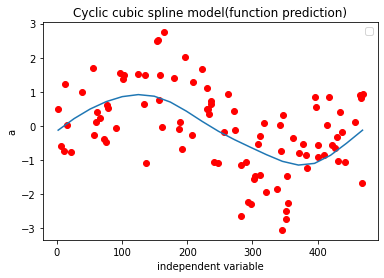

In [58]:
plt.scatter(x_test,y_test,color="red")
plt.plot(xp, pred5)
plt.legend()
plt.title("Cyclic cubic spline model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()

In [59]:
rms4 = sqrt(mean_squared_error(y_test, pred5_orig))
print(rms4)

1.0016273323894926


In [60]:
# Natural cubic spline

transformed_x3 = dmatrix("cr(train,df = 3)", {"train": x_train}, return_type='dataframe')


In [61]:
natural_spline = sm.GLM(y_train, transformed_x3).fit()

In [62]:
xp = np.linspace(x_test.min(),x_test.max(),20)
pred3 = natural_spline.predict(dmatrix("cr(valid, df=3)", {"valid": xp}, return_type='dataframe'))
pred3_orig = natural_spline.predict(dmatrix("cr(valid, df=3)", {"valid": x_test}, return_type='dataframe'))

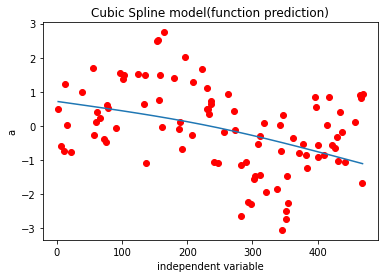

In [63]:
plt.scatter(x_test,y_test,color="red")
plt.plot(xp, pred3)
#plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.title("Cubic Spline model(function prediction)")
plt.xlabel("independent variable")
plt.ylabel("a")
plt.show()

In [64]:
rms5 = sqrt(mean_squared_error(y_test, pred3_orig))
print(rms5)

1.1395634190075292
